# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading Data

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 1.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
12705,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0293,0.0024,0.0024,0,0,0,0
182194,0.0659,0.0024,0.1050,0.2686,0.0488,0.0293,0.3369,0.5347,0.0024,0.1782,7,7,10,10
315490,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0244,0.1245,0.0024,0.0269,0,0,0,0
235733,0.0610,0.4199,0.4150,0.2490,0.0024,0.0024,0.1563,0.2124,0.2051,0.2295,1,1,17,17
207667,0.0098,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0781,0.0024,0.0708,0,0,0,0


In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471483 entries, 0 to 471482
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          471483 non-null  float64
 1   Emg2          471483 non-null  float64
 2   Emg3          471483 non-null  float64
 3   Emg4          471483 non-null  float64
 4   Emg5          471483 non-null  float64
 5   Emg6          471483 non-null  float64
 6   Emg7          471483 non-null  float64
 7   Emg8          471483 non-null  float64
 8   Emg9          471483 non-null  float64
 9   Emg10         471483 non-null  float64
 10  repetition    471483 non-null  int64  
 11  rerepetition  471483 non-null  int64  
 12  stimulus      471483 non-null  int64  
 13  restimulus    471483 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 50.4 MB


In [4]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000,471483.000000
mean,0.129657,0.122672,0.123409,0.044321,0.012722,0.014612,0.221796,0.233414,0.107259,0.072334,3.136047,2.113255,5.562892,4.570513
std,0.286859,0.322911,0.337717,0.167680,0.032359,0.042109,0.476014,0.353467,0.233386,0.156993,3.480664,3.212682,6.575838,6.427040
min,0.002400,0.000000,0.002400,0.000000,0.002400,0.000000,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.002400,0.012200,0.063500,0.002400,0.009800,0.000000,0.000000,0.000000,0.000000
50%,0.017100,0.002400,0.002400,0.002400,0.002400,0.002400,0.051300,0.112300,0.007300,0.039100,2.000000,0.000000,3.000000,0.000000
75%,0.114700,0.046400,0.058600,0.007300,0.002400,0.002400,0.190400,0.244100,0.136700,0.065900,6.000000,4.000000,10.000000,9.000000
max,4.665500,4.663100,4.658200,4.663100,0.876500,1.484400,4.663100,4.665500,4.660600,4.628900,10.000000,10.000000,23.000000,23.000000


In [5]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     202625
2      15538
12     15532
8      15531
7      15518
4      15516
11     15514
5      15492
9      15492
10     15477
1      15476
3      15469
6      15469
14     10361
13     10360
17     10346
15     10334
16     10320
18      5210
20      5202
19      5189
21      5185
23      5166
22      5161
Name: stimulus, dtype: int64


# Data Cleaning

In [6]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [7]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [8]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

# One Hot Encoding

In [9]:
num_classes = 24

In [11]:
# One hot encoding for categorical labels
import keras
from keras.utils.np_utils import to_categorical
from keras import utils as np_utils
y = keras.utils.np_utils.to_categorical(y, num_classes)

In [12]:
input_dim = X.shape[1]

# MinMaxScaler

In [13]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()

In [14]:
sc = pd.DataFrame(MinMaxScaler.fit_transform(X))

In [15]:
sc

,0,1,2,3,4,5,6,7,8,9
0,0.014154,0.000515,0.0,0.000515,0.0,0.006602,0.0,0.009950,0.000515,0.007520
1,0.012052,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.008385,0.000515,0.006361
2,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.007870,0.000515,0.005203
3,0.011537,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.006819,0.000515,0.003476
4,0.009950,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.007334,0.000515,0.002885
...,...,...,...,...,...,...,...,...,...,...
378530,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.011537,0.026198,0.000000
378531,0.000000,0.000515,0.0,0.000515,0.0,0.003301,0.0,0.010487,0.027250,0.000000
378532,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.010487,0.027250,0.000000
378533,0.000000,0.000515,0.0,0.000515,0.0,0.001617,0.0,0.009950,0.027765,0.000000


In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(sc, y, test_size = 0.2, random_state = 39)

# Deep Learning 

In [17]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.utils import plot_model
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import StratifiedKFold

In [18]:
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)

# 1. Define Network

In [19]:
num_classes = 24
input_dim = X.shape[1]

In [67]:
visible = Input(shape=(input_dim,))



e = Dense(16, activation='relu')(visible)
e = Dense(16, activation='softmax')(e)
e = Dense(16, activation='relu')(e)


output = Dense(num_classes, activation='softmax')(e)




model = Model(inputs=visible, outputs=output)

In [68]:
model.summary()

Model: "functional_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 10)]              0         
_________________________________________________________________
dense_37 (Dense)             (None, 16)                176       
_________________________________________________________________
dense_38 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_39 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_40 (Dense)             (None, 24)                408       
Total params: 1,128
Trainable params: 1,128
Non-trainable params: 0
_________________________________________________________________


# 2. Compile Network

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

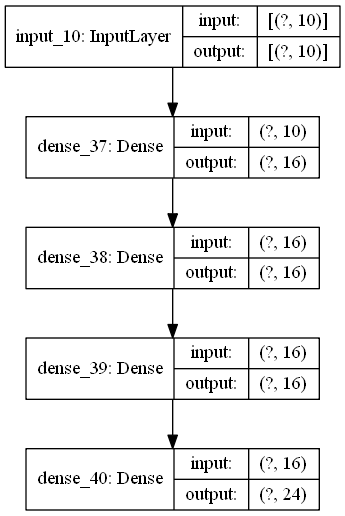

In [70]:
plot_model(model, 'EMG_ANN.png', show_shapes = True)

# 3. Fit Network

In [71]:
history = model.fit(X, y, batch_size=10, epochs=50)

Epoch 1/50
37854/37854 [==============================] - 35s 924us/step - loss: 1.4964 - accuracy: 0.5842
Epoch 2/50
37854/37854 [==============================] - 34s 910us/step - loss: 1.2780 - accuracy: 0.6406
Epoch 3/50
37854/37854 [==============================] - 34s 899us/step - loss: 1.1798 - accuracy: 0.6707
Epoch 4/50
37854/37854 [==============================] - 34s 907us/step - loss: 1.1147 - accuracy: 0.6880
Epoch 5/50
37854/37854 [==============================] - 35s 917us/step - loss: 1.0736 - accuracy: 0.7006
Epoch 6/50
37854/37854 [==============================] - 34s 909us/step - loss: 1.0447 - accuracy: 0.7107
Epoch 7/50
37854/37854 [==============================] - 35s 926us/step - loss: 1.0235 - accuracy: 0.7165
Epoch 8/50
37854/37854 [==============================] - 36s 964us/step - loss: 1.0083 - accuracy: 0.7204
Epoch 9/50
37854/37854 [==============================] - 35s 916us/step - loss: 0.9953 - accuracy: 0.7241
Epoch 10/50
37854/37854 [============

KeyboardInterrupt: 

# 4.Evaluate Network

## 4.1. Plotting Loss and Accuracy

In [ ]:
#Loss Curve
pyplot.plot(history.history['loss'], label = 'Training Loss')
pyplot.plot(history.history['val_loss'], label = "Test Loss")
pyplot.legend()
pyplot.show()

In [ ]:
#accuracy Curve
pyplot.plot(history.history['accuracy'], label = 'Training Accuracy')
pyplot.plot(history.history['val_accuracy'], label = "Test Accuracy")
pyplot.legend()
pyplot.show()

## 4.2 Evaluation

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)

##  4.3 Make Predictions

In [ ]:
predictions = model.predict(X_test)

In [ ]:
predictions